# Matplotlib - Lesson 2 - Tables to Idioms

• visual encoding idiom: how to draw

### First the Data

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
data = []
data=pd.read_csv(url)
data = data.dropna() # replace all NAs with 0s

### Remove the United States entries

data = data[data.location != "United States"]

data.total_vaccinations = data.total_vaccinations/100000
data.total_distributed = data.total_distributed/100000
data.people_vaccinated = data.people_vaccinated/100000

In [87]:
data.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
1,2021-01-13,Alabama,0.84040,3.78975,0.74792,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
3,2021-01-15,Alabama,1.00567,4.44650,0.86956,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
7,2021-01-19,Alabama,1.30795,4.44650,1.14319,0.33,2.67,16346.0,2.33,9.07,7557.0,7523.0,1534.0,0.294
8,2021-01-20,Alabama,1.39200,4.83275,1.21113,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288
9,2021-01-21,Alabama,1.65919,4.93125,1.44429,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336


### Acknowledgement 

<cite>Max Roser, Hannah Ritchie, Esteban Ortiz-Ospina and Joe Hasell (2020) - "Coronavirus Pandemic (COVID-19)". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/coronavirus' [Online Resource]<cite>
    
Original Link: https://github.com/owid/covid-19-data (Accessed 3/11/2021)
Source Link: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations 

### Today's and Yesterday's date and data

In [88]:
from datetime import datetime, timedelta

todaysDate = datetime.today()
yesterdaysDate = todaysDate  - timedelta(days=1)
yesterdaysDate = yesterdaysDate.strftime('%Y-%m-%d')
twoDays = todaysDate - timedelta(days=2)
twoDays = twoDays.strftime('%Y-%m-%d')

data[data.date==yesterdaysDate].head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
57,2021-03-10,Alabama,11.73820,17.75660,7.68502,8.87,23.94,435018.0,15.67,36.21,32836.0,24827.0,5063.0,0.661
115,2021-03-10,Alaska,3.07769,4.45125,1.88281,16.28,42.07,119073.0,25.74,60.85,5082.0,4917.0,6721.0,0.691
173,2021-03-10,American Samoa,0.23696,0.43210,0.15085,15.63,42.55,8706.0,27.09,77.59,2071.0,374.0,6716.0,0.548
231,2021-03-10,Arizona,22.93559,28.87485,14.64494,10.54,31.51,767107.0,20.12,39.67,47705.0,51794.0,7116.0,0.794
289,2021-03-10,Arkansas,7.99184,11.62330,5.13591,9.45,26.48,285284.0,17.02,38.52,16434.0,15964.0,5290.0,0.688


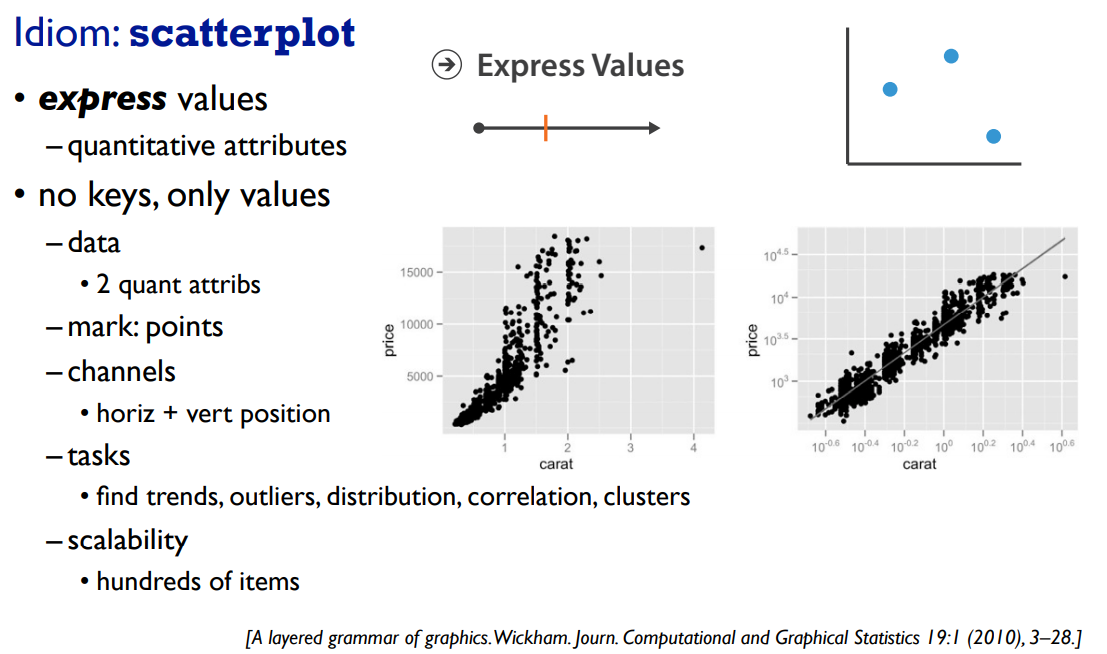

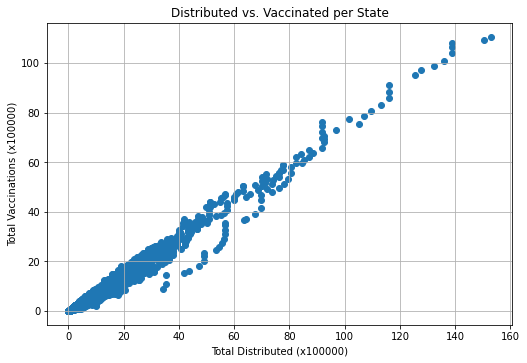

In [105]:
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(600*px, 400*px))

ax.scatter(data.total_distributed, data.total_vaccinations)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Total Distributed (x100000)' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Distributed vs. Vaccinated per State' )
ax.grid()

# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

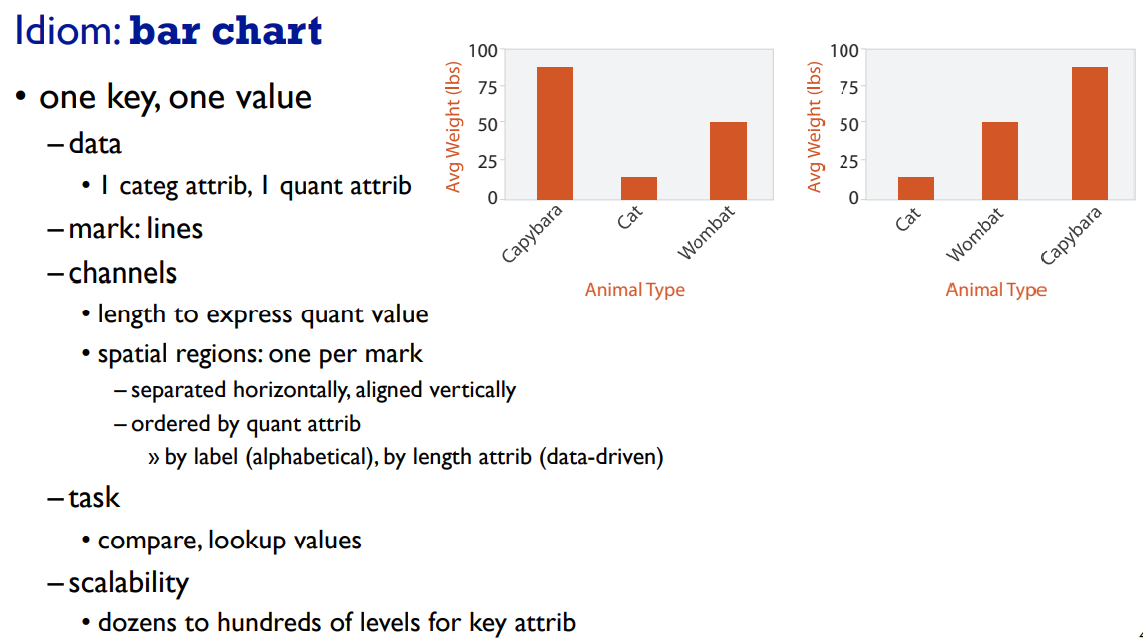

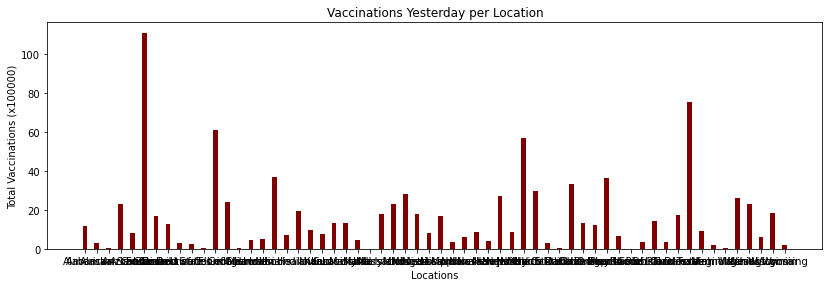

In [101]:
# creating the bar plot
yData = data[data.date==yesterdaysDate]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(yData.location, yData.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

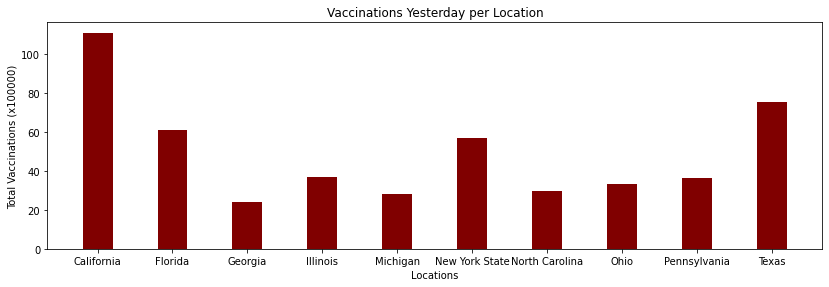

In [99]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]

top10Yest = yData[yData.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

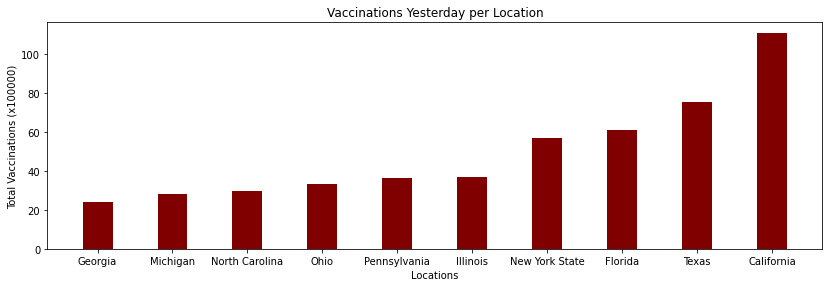

In [100]:
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]

sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(top10Yest.location, top10Yest.total_vaccinations, color ='maroon', width = 0.4)

# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )


### Paired Bar Chart

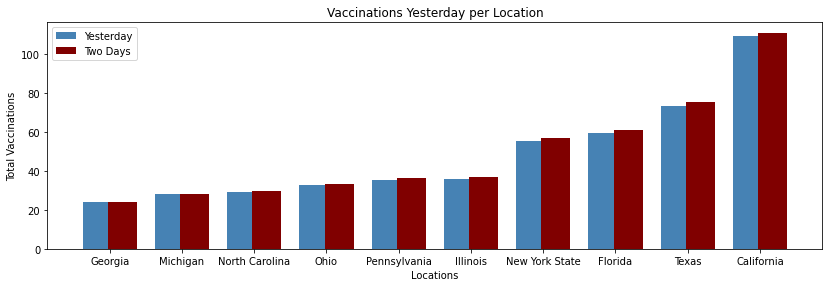

In [93]:
import numpy as np
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]
sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]

twoData = data[data.date==twoDays]
sortedData = twoData.sort_values(by=['total_vaccinations'])
top102days = sortedData[sortedData.location.isin(top10)]

x = np.arange(len(sortedData[sortedData.location.isin(top10)].location))  # the label locations
width = 0.35  # the width of the bars

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
ax.bar(x - width/2, top102days.total_vaccinations, color ='steelblue', width = 0.4, label="Yesterday")
ax.bar(x + width/2, top10Yest.total_vaccinations, color ='maroon', width = 0.4, label="Two Days")
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations (x100000)' )
ax.set_xticks(x)
ax.set_xticklabels(sortedData[sortedData.location.isin(top10)].location)

ax.legend()

plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

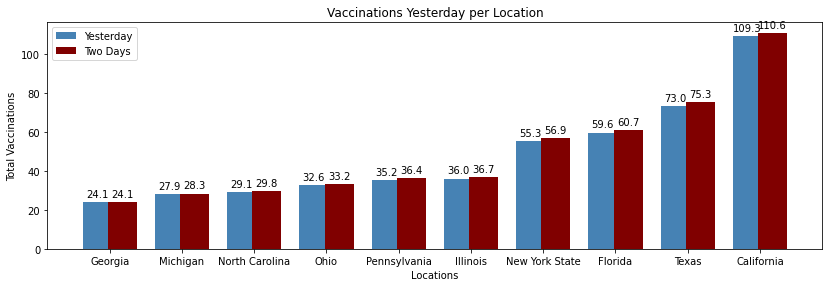

In [98]:
import numpy as np
# creating the bar plot
top10 = ["California","Texas","Florida","New York State","Illinois","Pennsylvania","Ohio","Georgia","North Carolina","Michigan"]
yData = data[data.date==yesterdaysDate]
sortedData = yData.sort_values(by=['total_vaccinations'])
top10Yest = sortedData[sortedData.location.isin(top10)]

twoData = data[data.date==twoDays]
sortedData = twoData.sort_values(by=['total_vaccinations'])
top102days = sortedData[sortedData.location.isin(top10)]

x = np.arange(len(sortedData[sortedData.location.isin(top10)].location))  # the label locations
width = 0.35  # the width of the bars

px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig, ax = plt.subplots(1,figsize=(1000*px, 300*px))
rects1 = ax.bar(x - width/2, top102days.total_vaccinations, color ='steelblue', width = 0.4, label="Yesterday")
rects2 = ax.bar(x + width/2, top10Yest.total_vaccinations, color ='maroon', width = 0.4, label="Two Days")
# Add labels, a title and grid lines to the plot
ax.set_xlabel( 'Locations' )
ax.set_ylabel( 'Total Vaccinations' )
ax.set_xticks(x)
ax.set_xticklabels(sortedData[sortedData.location.isin(top10)].location)

ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


plt.title( 'Vaccinations Yesterday per Location' )
# Show the figure (here in Jupyter)
plt.show( fig )
plt.close( fig )

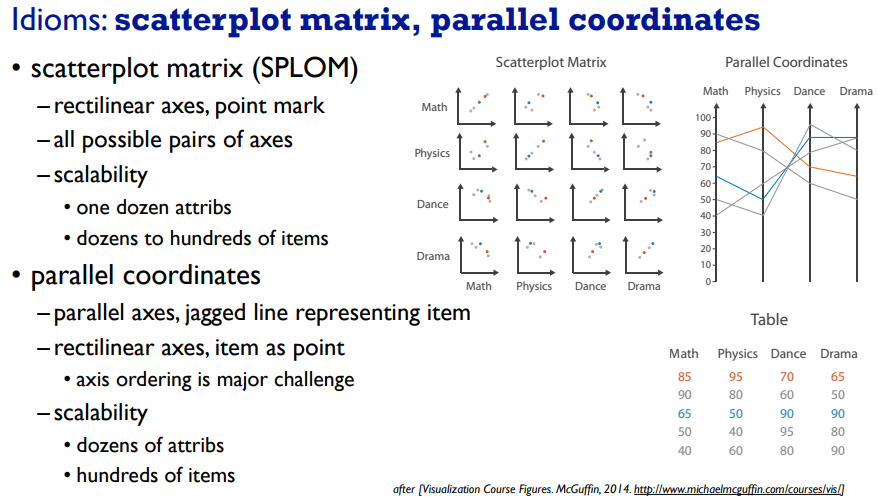

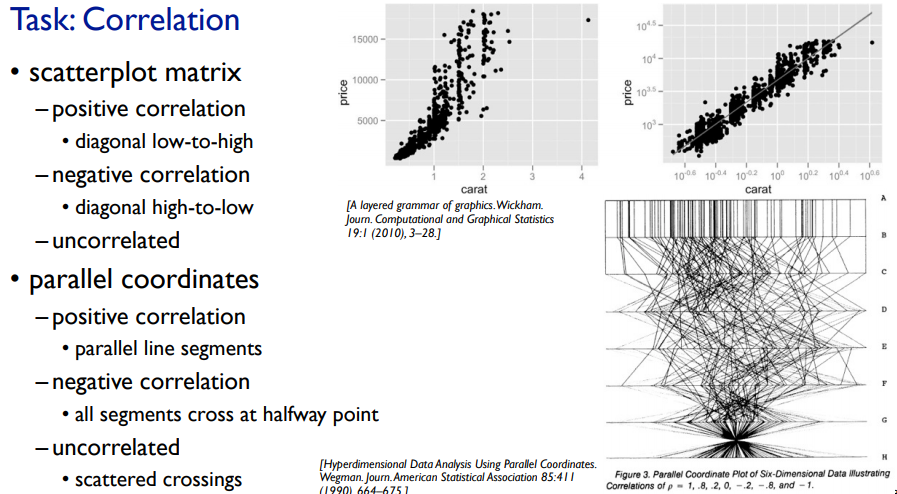

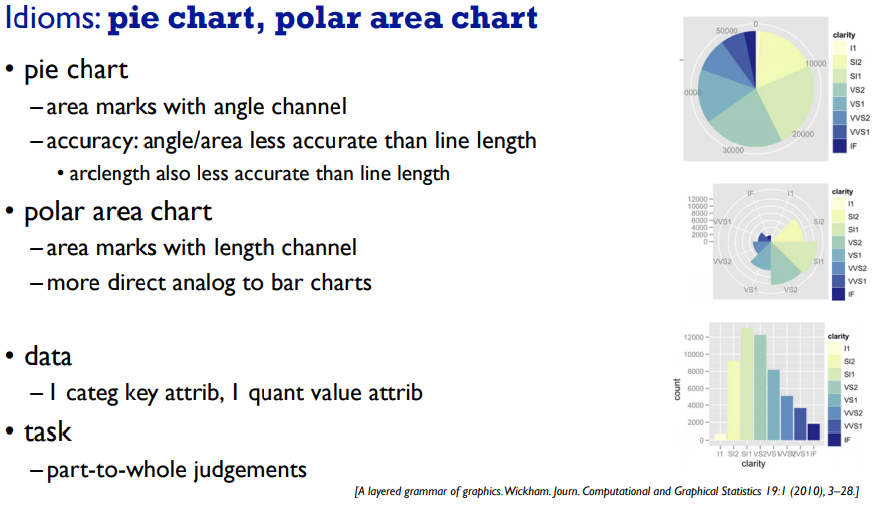

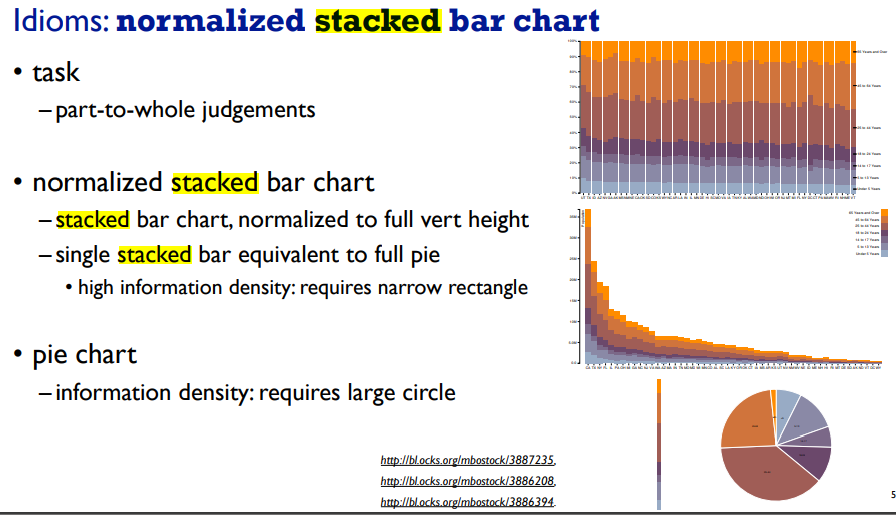

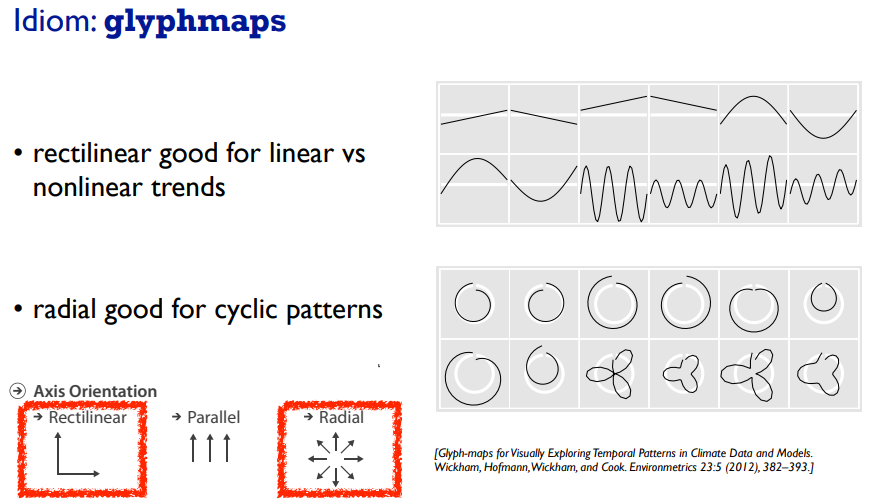

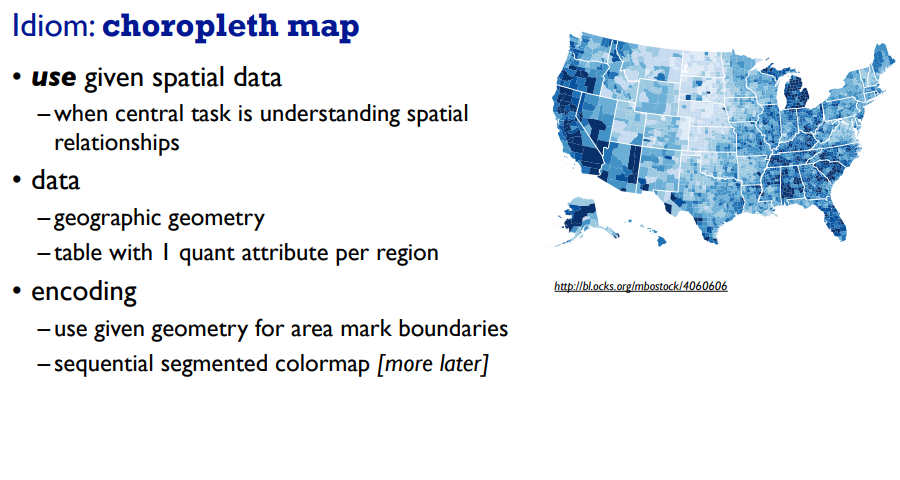